In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import complex_ode
from scipy.integrate import solve_ivp
from tqdm.notebook import tqdm



In [ ]:



def to_3x3(flat):
    return np.array([[flat[0], flat[1], flat[2]],
                     [flat[3], flat[4], flat[5]],
                     [flat[6], flat[7], flat[8]]], dtype=complex)

def matprint(mat, fmt="g", round=3):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]

    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(np.round(y, round)), end="  ")
        print("")

def function2(t, p_, gamma, omega_1, omega_2_, sig_delta, sig_length):
    """
    Different approach describe by the 5 equations denoted (3) from [1]
    In this system, the ground state is 3 (a), the oscilatary

    Values differ as such that:
    p_11 = p[c, c]
    p_13 = p[c, a]
    p_22 = p[b, b]
    p_23 = p[b, a]
    p_33 = p[a, a]
    p_12 = p[c, b]

    """

    global last_time

    #signal_freq = 10
    #signal_len = 2
    #driving signal for a->b

    measure = False
    if(t-last_time > sig_delta):
        measure=True
        #omega_2 = omega_2_
        #print("measure")
        if(t-last_time > sig_delta + sig_len):
            measure = False
            last_time = t
            #omega_2 = 0
            #print("measure end")

    omega_2 = omega_2_ if measure else 0
    a, b, c = 0,1,2
    #print(p_)
    #matprint(to_3x3(p_).round(2))
    #print("\n")

    p = to_3x3(p_)

    #print(t)
    dot_p = np.zeros((3,3), dtype=complex)
    #print(omega_2)
    #omega_2 = 0

    dot_cc = -1j * omega_2 * (p[c,a] - np.conj(p[c,a])) - gamma * p[c,c]
    dot_p[c,c] = dot_cc

   
    dot_ca = 1j * omega_2 * (p[a,a] - p[c,c]) - 1j * omega_1 * p[c,b] - gamma * p[c,a]
    dot_p[c,a] = dot_ca

    dot_bb = -1j * omega_1 * (p[b,a] - np.conj(p[b,a]))
    dot_p[b,b] = dot_bb

    dot_ba= 1j * omega_1* (p[a,a] - p[b,b]) - 1j * omega_2 * np.conj(p[c,b])
    dot_p[b,a] = dot_ba

    dot_aa= -(dot_p[c,c]+dot_p[b,b])
    dot_p[a,a] = dot_aa


    dot_cb= 1j * omega_2*np.conj(p[b,a])  -1j*omega_1*p[c,a]- (gamma/2)*p[c,b]
    dot_p[c,b] = dot_cb

    return dot_p.flatten()


500
omega_2 0
signal length:  1.2732395447351625  signal delta:  12.732395447351625
time (500,)
500
(500, 9)
last i 0


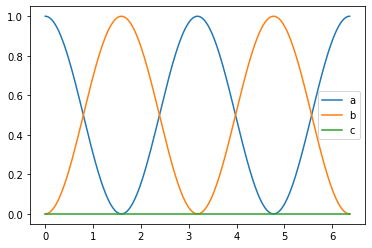

In [ ]:

t_max = 100
t_span = np.linspace(0, t_max, 500)
print(len(t_span))
last_time = 0

omega_1 = np.pi * 2 * 0.01
gamma =250 * omega_1
omega_2 = 0

print("omega_2", omega_2)

sig_len = 20 * 1/gamma
sig_delta = 10 * sig_len
print("signal length: ", sig_len ," signal delta: ",sig_delta)
args = [gamma, omega_1, omega_2, sig_delta, sig_len]

#initial state has 100% probabiltiy that atoms are in state a
p0 = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]], dtype=complex)


#print("TEST: ", np.imag(p0[0,0]))
#print(t_span)

#print(p0)
p0 = p0.flatten()

#print(p0)
i=0

solved = solve_ivp(function2, [0,t_max], p0, t_eval=t_span, args=args, max_step = 0.1)

time = solved.t * 1/gamma

print("time", time.shape)
sol = solved.y.T
#(time)
#sol = odeintw(function, p0, t_span)
print(len(sol))
print(sol.shape)
print("last i", i)
#print(sol[4])
probs = np.zeros((len(t_span), 3))

for i in range(len(sol)):

    #if(i%1 == 0):
    #    matprint(to_3x3(sol[i]).round(2))
    #    print("\n")

    #trace.append(round(np.trace(to_3x3(sol[i])),2))
    probs[i, 0] = np.sqrt(np.real(sol[i][0] * np.conj(sol[i][0])))
    probs[i, 1] = np.sqrt(np.real(sol[i][4] * np.conj(sol[i][4])))
    probs[i, 2] = np.sqrt(np.real(sol[i][8] * np.conj(sol[i][8])))

    trace  = probs[i,0] + probs[i,1] + probs[i,2]
    #probs[i,:]/=trace


#print(probs[:,0])
plt.plot(time, probs[:,0], label="a")
plt.plot(time, probs[:,1], label='b')
plt.plot(time, probs[:,2], label='c')
plt.legend()
plt.show()

In [ ]:
imag = np.imag(10)
print(imag)

0


In [ ]:
test = -1j * 0 * 230530j
print(test)

0j


In [ ]:


def function3(t, p_, gamma, omega_1, omega_2, measure):
    """
    Different approach describe by the 5 equations denoted (3) from
    https://journals-aps-org.libproxy.ucl.ac.uk/pra/pdf/10.1103/PhysRevA.44.1962
    In this system, the ground state is 3 (a), the oscilatary

    Values differ as such that:
    p_11 = p[c, c]
    p_13 = p[c, a]
    p_22 = p[b, b]
    p_23 = p[b, a]
    p_33 = p[a, a]
    p_12 = p[c, b]

    """
    a, b, c = 0,1,2

    p = to_3x3(p_)

    dot_p = np.zeros((3,3), dtype=complex)


    dot_cc = -1j * omega_2 * (p[c,a] - np.conj(p[c,a])) - gamma * p[c,c]
    dot_p[c,c] = dot_cc

   
    dot_ca = 1j * omega_2 * (p[a,a] - p[c,c]) - 1j * omega_1 * p[c,b] - gamma * p[c,a]
    dot_p[c,a] = dot_ca 

    dot_bb = -1j * omega_1 * (p[b,a] - np.conj(p[b,a]))
    dot_p[b,b] = dot_bb

    dot_ba= 1j * omega_1* (p[a,a] - p[b,b]) - 1j * omega_2 * np.conj(p[c,b])
    dot_p[b,a] = dot_ba

    dot_aa= -(dot_p[c,c]+dot_p[b,b])
    dot_p[a,a] = dot_aa


    dot_cb= 1j * omega_2*np.conj(p[b,a])  -1j*omega_1*p[c,a]- (gamma/2)*p[c,b]
    dot_p[c,b] = dot_cb

    # if(measure):
    #     dot_p[c,a] = 0
    #     dot_p[b,a] = 0
    #     dot_p[c,b] = 0


    return dot_p.flatten()

def remove1d_diag(flat):
    '''
    Takeas a flat 3x3 matrix (9 elements) and forms a flat matrix that contains
    only the diagonal elements of the initial matrix, with all other elements set to 0
    '''
    return np.array([flat[0], 0,       0,
                     0,       flat[4], 0,
                     0,       0,       flat[8] ])

def SimulateMeasurement(p0, t_max, dt_max, gamma, omega_1, omega_2, sig_delta, sig_len):

    time_sig_delta = np.linspace(0, sig_delta, int(sig_delta/dt_max))

    time_sig_len = np.linspace(0, sig_len, int(sig_len/dt_max))

    sol_time = []
    sol_y = []
    current_t = 0
    p_last = p0
    measure = False

    total_sol_len = 0

    #Loop for whole simulation
    while(current_t < t_max):

        sol = None
        if(measure):
            #print("measure")
            #matprint(to_3x3(p_last))
            p_last = remove1d_diag(p_last)

            args = [gamma, omega_1, omega_2, measure]
            sol = solve_ivp(function3, [0, sig_len], p_last,  t_eval=time_sig_len, args=args, max_step = dt_max)
            measure = False
            current_t += sig_len
        else:

            #print("not")
            p_last = remove1d_diag(p_last)
            #matprint(to_3x3(p_last))

            #If we are not currently measuring, we run the simulation with omega_2=0
            args = [gamma, omega_1, 0, measure]
            sol = solve_ivp(function3, [0,sig_delta], p_last, t_eval=time_sig_delta, args=args, max_step = dt_max)
            measure = True
            current_t += sig_delta

        #sol_time.append(sol.t)

        #print(sol.y.T.shape)
        sol_y.append(sol.y.T)
        p_last = sol.y.T[-1]
        total_sol_len += len(sol.y.T)
    #print(total_sol_len)
    final_sol = np.zeros((total_sol_len, 9), dtype=complex)
    i = 0
    for element in sol_y:
        for matrix in element:
            final_sol[i] = np.array(matrix, dtype=complex)
            i+=1
    #sol_time = np.array(sol_time)
    #sol_time = sol_time.flatten()

    return final_sol


In [ ]:
p0 = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]], dtype=complex)
t_max = 1
dt_max = 0.001

omega_1 = np.pi * 2
gamma =250 * omega_1
omega_2 = gamma

n = 64

sig_len = 20 * 1/gamma
sig_delta = omega_1/n if n > 0 else t_max#1000 * sig_len
p0= p0.flatten()

sol = SimulateMeasurement(p0, t_max, dt_max, gamma, omega_1, omega_2, sig_delta, sig_len)

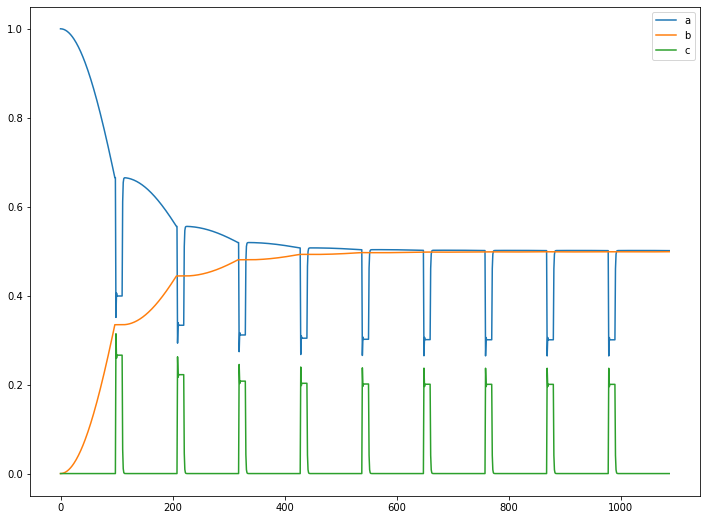

In [ ]:
probs = np.zeros((len(sol), 3))

for i in range(len(sol)):

    #if(i%1 == 0):
    #    matprint(to_3x3(sol[i]).round(2))
    #    print("\n")

    #trace.append(round(np.trace(to_3x3(sol[i])),2))
    probs[i, 0] = np.sqrt(np.real(sol[i][0] * np.conj(sol[i][0])))
    probs[i, 1] = np.sqrt(np.real(sol[i][4] * np.conj(sol[i][4])))
    probs[i, 2] = np.sqrt(np.real(sol[i][8] * np.conj(sol[i][8])))

    trace  = probs[i,0] + probs[i,1] + probs[i,2]
    #probs[i,:]/=trace


plt.figure(figsize=(12, 9))
plt.plot(probs[:,0], label="a")
plt.plot(probs[:,1], label='b')
plt.plot(probs[:,2], label='c')
plt.legend()
plt.show()

In [ ]:
def CalculateProbForCustLenDelta(p0, t_max, dt_max, gamma, omega_1, omega_2, sig_len, sig_delta):
    #sig_len = 20 * 1/gamma
    #sig_delta = omega_1/n if n > 0 else t_max#1000 * sig_len
    if(sig_delta == np.inf):
        sig_delta = t_max

    sol = SimulateMeasurement(p0, t_max, dt_max, gamma, omega_1, omega_2, sig_delta, sig_len)

    probs = np.zeros((len(sol), 3))

    for i in range(len(sol)):

 
        probs[i, 0] = np.sqrt(np.real(sol[i][0] * np.conj(sol[i][0])))
        probs[i, 1] = np.sqrt(np.real(sol[i][4] * np.conj(sol[i][4])))
        probs[i, 2] = np.sqrt(np.real(sol[i][8] * np.conj(sol[i][8])))

    return probs

def CalculateProbFor_n_measurements(p0, t_max, dt_max, gamma, omega_1, omega_2, n):
    sig_len = 20 * 1/gamma
    sig_delta = omega_1/n if n > 0 else t_max#1000 * sig_len


    sol = SimulateMeasurement(p0, t_max, dt_max, gamma, omega_1, omega_2, sig_delta, sig_len)

    probs = np.zeros((len(sol), 3))

    for i in range(len(sol)):

 
        probs[i, 0] = np.sqrt(np.real(sol[i][0] * np.conj(sol[i][0])))
        probs[i, 1] = np.sqrt(np.real(sol[i][4] * np.conj(sol[i][4])))
        probs[i, 2] = np.sqrt(np.real(sol[i][8] * np.conj(sol[i][8])))

    return probs

In [ ]:

p0 = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]], dtype=complex).flatten()
t_max = 1
dt_max = 0.01

omega_1 = np.pi * 2
gamma =250 * omega_1
omega_2 = gamma

all_n = [0, 40]

n_results_b = {}



for n in all_n:
    print(n, " measurements per cycle")
    probs = CalculateProbFor_n_measurements(p0, t_max, dt_max, gamma, omega_1, omega_2, n)
    n_results_b[n] = probs[:,1]

0  measurements per cycle
40  measurements per cycle
measure
measure
measure
measure
measure


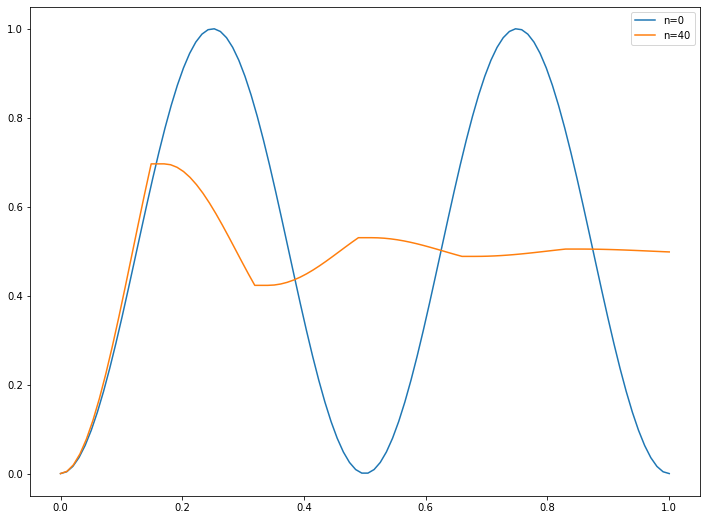

In [ ]:
plt.figure(figsize=(12,9))
for n in n_results_b.keys():
    res = n_results_b[n]
    time = np.linspace(0, t_max, len(res)) 
    plt.plot(time, n_results_b[n], label = "n={0}".format(n))
plt.legend()
plt.show()

measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure
measure


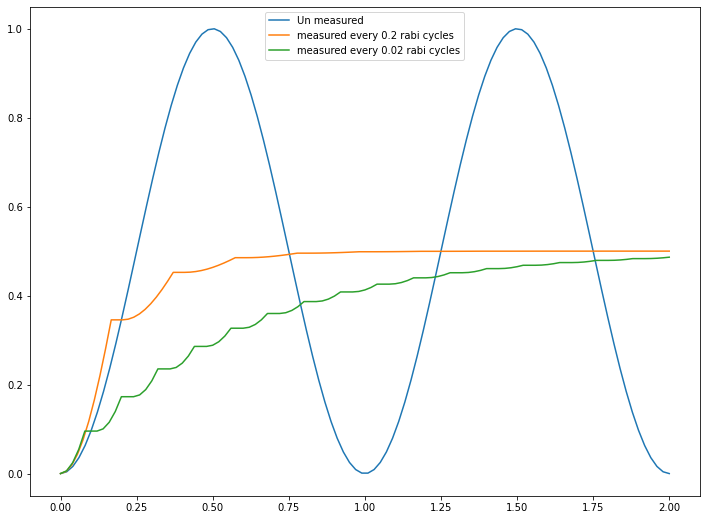

In [ ]:
p0 = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]], dtype=complex).flatten()
t_max = 1
dt_max = 0.01

omega_1 = np.pi * 2
gamma =250 * omega_1
omega_2 = gamma


b_result_1 = CalculateProbForCustLenDelta(p0, t_max, dt_max, gamma, omega_1, omega_2, 0, t_max)

b_result_2 = CalculateProbForCustLenDelta(p0, t_max, dt_max, gamma, omega_1, omega_2, 0.01 , 0.1)

plt.figure(figsize=(12,9))

time = np.linspace(0, t_max, len(b_result_1[:,1])) / 0.5
plt.plot(time, b_result_1[:,1], label="Un measured")

time2 = np.linspace(0, t_max, len(b_result_2))  / 0.5
plt.plot(time2, b_result_2[:,1], label="measured every 0.2 rabi cycles")

plt.legend()
plt.show()

In [ ]:
p0 = np.array([[1,0,0],
               [0,0,0],
               [0,0,0]], dtype=complex).flatten()
t_max = 2
dt_max = 0.01

omega_1 = np.pi * 2
gamma =250 * omega_1
omega_2 = gamma

measure_deltas = [np.inf, 0.2, 0.1, 0.04]
results = []
for delta in measure_deltas:
    d = delta
    if d != np.inf:
        d = delta/2
    results.append(CalculateProbForCustLenDelta(p0, t_max, dt_max, gamma, omega_1, omega_2, 0.01, d)[:,1])


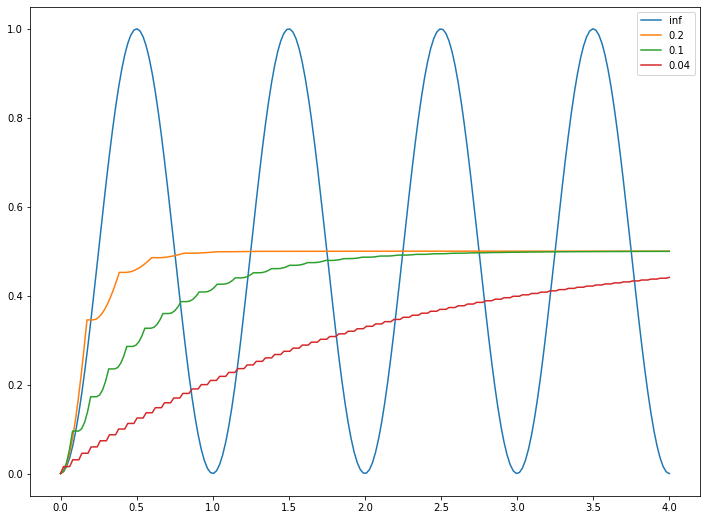

In [ ]:
plt.figure(figsize=(12,9))

for i, res in enumerate(results):
    time = np.linspace(0, t_max, len(res)) / 0.5
    plt.plot(time, res, label=measure_deltas[i])

plt.legend()
plt.show()

## Monte Carlo Wave Function
The monte carlo wave function approach (MCWF) works by performing quantum jumps:
a probability at each time step that a system changes quantum states is calculated. This is then compared to a random number. If it falls within the correct bounds, we apply the jump.
From "Quantum Monte Carlo approach to the non-equilibrium
steady state of open quantum systems, 2020" we get the following algorithm:




1.   From an initial state $|\psi_\alpha(t)\rangle$ compute the probability of no jump, $p_0$:
    $$
     p_0 = 1 - \delta t \sum_k \langle\psi_a|\hat{L}^\dagger_k\hat{L}_k|\psi_a\rangle 
     $$
    and the probabilities $p_k$ associated with the jump operator $\hat{L}_k$:
    $$
    p_k = \delta t \langle\psi_a|\hat{L}^\dagger_k\hat{L}_k|\psi_a\rangle 
    $$
2.   Determine if a jump will occur. If it does occur, randomly choose a jump operator $\hat{L}_k$. We do this by generating a random number $r \in [0,1]$, if $r<p_{0}$, then no jump occurs and the system evolves via $\hat{H}_{eff}$. Otherwise, we choose the jump operator $\hat{L}_k$ such that we choose the smallest k=n that satisfies:
    $$\sum_{k=0}^n p_k > r$$
3.   If no jump occurs, compute the infinitesmial evolution generated by $\hat{H}_{eff}$, and renormalise with $p_0$.
4.   If a jump does occur, calculate the new state $|\psi_a(t+\delta t)\rangle$ and normalise with $p_k$L
    $$|\psi_a^k\rangle = \sqrt{\frac{\delta t}{p_k}}\hat{L}_k |\psi_a\rangle$$


To attempt an actual implimentation, a bit of research found https://github.com/timy/mcwf
This has an example in C++, let us see if we can instead write the same logic in python, to ensure we understand how this implimentation works.

In [ ]:
Omega = 100
delta = 100
Gamma = 1
nt = 1000
ns = 1
dt = .01

Sp = np.array([[0, 0],
               [1,0]], dtype=complex)
Sm = np.array([[0, 1],
               [0,0]], dtype=complex)
Ee = np.array([[0, 0],
               [0,1]], dtype=complex) #Sigma+ * Sigma-
Ve = np.array([[0, 1],
               [1,0]], dtype=complex) #Sigma+ + Sigma-
Id = np.array([[1, 0],
               [0,1]], dtype=complex)

N = 2
#Define a complex number properly, because we aren't engineers
I = 1j

def GenerateHamiltonian(N):
    ham = np.zeros((N,N), dtype=complex)
    for i in range(N):
        for j in range(N):
            ham[i,j] = - delta * Ee[i,j] + 0.5 * Omega * Ve[i,j] - 0.5 * I * Gamma * Ee[i,j]
    return ham

def GenerateEvolutionU(N, ham, dp):
    mu = 1/np.sqrt(1-dp)
    U = np.zeros((N,N), dtype=complex)

    for i in range(N):
        for j in range(N):
            U[i,j] = mu * (Id[i,j] - I * dt * ham[i,j])
    return U

def normalize(N, phi):
    norm = 0
    for i in range(N):
        norm += np.real(np.conj(phi[i]) * phi[i])
    norm = np.sqrt(norm)
    for i in range(N):
        phi[i] /= norm


def propagate(N, U, phi_old, phi_new):
    for i in range(N):
        phi_new[i] = 0
        for k in range(N):
            phi_new[i] += U[i,k] * phi_old[k]

def propagate_single_traj(N, ham, phi, measure_it):
    phi[0,0] = 1
    phi[0,1] = 0
    for it in range(1, nt):
        #Generate the probability of a jump occuring.
        #A jump is more likely when dp is minimized
        #dp is smallest when the |phi| is small
        dp = np.real(Gamma * dt * np.conj(phi[it-1, 1]) * phi[it - 1, 1])
        epsilon = np.random.rand()

        if(it%measure_it == 0):
            phi[it,0] = 1
            phi[it,1] = 0
            #print("m")
            continue

        #print(dp, epsilon)
        if(epsilon >= dp):
            U = GenerateEvolutionU(N, ham, dp)
            propagate(N,U, phi[it-1], phi[it])
            normalize(N, phi[it])
        else:
            #print("this one?: ", epsilon, dp)
            phi[it,0] = 1
            phi[it,1] = 0

def run_sim(N, nt, ns):

    all_phi = np.zeros((ns, nt, N), dtype=complex)
    phi = np.zeros((nt, N), dtype=complex)
    population = np.zeros((nt, N))
    ham = GenerateHamiltonian(N)
    #re run the simulation for ns times, taking the average
    for is_ in range(ns):
        propagate_single_traj(N, ham, phi, 300)
        all_phi[is_] = phi
        for it in range(nt):
            for i in range(N):
                population[it,i] += np.real(np.conj(phi[it,i]) * phi[it, i])/(1*ns)
    return population, all_phi

In [ ]:
pop, all_phi = run_sim(2, nt, ns)
print(pop.shape)
print(all_phi.shape)

(1000, 2)
(1, 1000, 2)


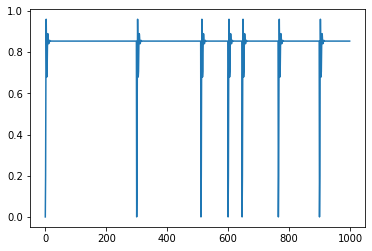

(1000, 2)


In [ ]:
plt.plot(pop[:,1])
plt.show()
phi_0 = all_phi[0]
print(phi_0.shape)

phi_real = np.real(phi_0[:,0])
phi_im = np.imag(phi_0[:,1])
phi_abs = np.sqrt((phi_real * phi_real + phi_im * phi_im))

#print(phi_real)
#print(phi_im)

#plt.plot(phi_abs)
#prob_phi = np.real(np.conj(phi_0) * phi_0)
#plt.plot(prob_phi)
#plt.plot(np.real(phi_0[:,0]), label="r_0")
# plt.plot(np.imag(phi_0[:,1]), label="i_0")

# plt.plot(np.real(phi_0[:,1]), label="r_1")
#plt.plot(np.imag(phi_0[:,1]), label="i_1")


#plt.legend()

## Monte Carlo Wave Function
The monte carlo wave function approach (MCWF) works by performing quantum jumps:
a probability at each time step that a system changes quantum states is calculated. This is then compared to a random number. If it falls within the correct bounds, we apply the jump.
From "Quantum Monte Carlo approach to the non-equilibrium
steady state of open quantum systems, 2020" we get the following algorithm:




1.   From an initial state $|\psi_\alpha(t)\rangle$ compute the probability of no jump, $p_0$:
    $$
     p_0 = 1 - \delta t \sum_k \langle\psi_a|\hat{L}^\dagger_k\hat{L}_k|\psi_a\rangle 
     $$
    and the probabilities $p_k$ associated with the jump operator $\hat{L}_k$:
    $$
    p_k = \delta t \langle\psi_a|\hat{L}^\dagger_k\hat{L}_k|\psi_a\rangle 
    $$
2.   Determine if a jump will occur. If it does occur, randomly choose a jump operator $\hat{L}_k$. We do this by generating a random number $r \in [0,1]$, if $r<p_{0}$, then no jump occurs and the system evolves via $\hat{H}_{eff}$. Otherwise, we choose the jump operator $\hat{L}_k$ such that we choose the smallest k=n that satisfies:
    $$\sum_{k=0}^n p_k > r$$
3.   If no jump occurs, compute the infinitesmial evolution generated by $\hat{H}_{eff}$, and renormalise with $p_0$.
4.   If a jump does occur, calculate the new state $|\psi_a(t+\delta t)\rangle$ and normalise with $p_k$:
    $$|\psi_a^k\rangle = \sqrt{\frac{\delta t}{p_k}}\hat{L}_k |\psi_a\rangle$$

https://reader.elsevier.com/reader/sd/pii/S0010465518304314?token=67EF6475FBFA78FBB92DE05BDEB844DB8682028E5130079533C2BFB0597605790D59A1A033F5B5286B9790E2B798DB67

From this paper, section 4:
In this paper we finallt find some equations which describe the form of the Hamiltonian, and the non hermitian hamiltonian

I copied the above text to help with writing the functions below


In [ ]:
a_dag = np.array([[0, 0],
                  [1,0]], dtype=complex)
a     = np.array([[0, 1],
                  [0, 0]], dtype=complex)

a_dag_minus_a = np.array([[0, -1],
                          [1,  0]], dtype=complex)
a_dag_mult_a =  np.array([[0, 0],
                          [0,1]], dtype=complex)
nt = 100
ns = 1
dt = .01

n_th = 1
kappa = 1
jump_operators = []
gamma = 1


jump_operator_mults = [np.sqrt(gamma), np.sqrt(gamma+1)]
jump_operators.append(np.matrix(np.sqrt(gamma) * a))
jump_operators.append(np.matrix(np.sqrt(gamma+1) * a_dag))

I = 1j
hbar = 1
#frequency of rabi cycle a->b
eta = 2 * np.pi 

def GenerateHamiltonian(N):
    ham = I * eta * a_dag_minus_a
    return ham

def GenerateEvolutionU(N, ham, dp):
    mu = 1/np.sqrt(1-dp)
    U = np.zeros((N,N), dtype=complex)

    for i in range(N):
        for j in range(N):
            U[i,j] = mu * (Id[i,j] - I * dt * ham[i,j])
    return U

def normalize(N, phi):
    norm = 0
    
    for i in range(N):
        norm += np.real(np.conj(phi[i]) * phi[i])
    norm = np.sqrt(norm)
    if(norm == 0):
        print(phi)
        #Here we find a weird bug, when our wave function becomes 0. This should never be the case
        phi[0] = 1
        return False
        #norm =1
    #print(norm)
    for i in range(N):
        phi[i] /= norm

    return True

def propagate(N, U, phi_old, phi_new):
    for i in range(N):
        phi_new[i] = 0
        for k in range(N):
            phi_new[i] += U[i,k] * phi_old[k]

def calcP_k(N, phi):
    results = np.zeros((N))
    for k in range(N):

        p_k = np.real(np.conj(phi[1]) *  np.conj(jump_operator_mults[k]) * jump_operator_mults[k] * phi[1])
        results[k]=(p_k)

    return results

#def updateWF(N, ham, dp, phi_all):



def propagate_single_traj(N, ham, phi, measure_it, measure_steps):
    phi[0,0] = 1
    phi[0,1] = 0

    last_delta = 0

    for it in range(1, nt):
        #print(phi[it-1])
        #Generate the probability of a jump occuring.
        #A jump is more likely when dp is minimized
        #dp is smallest when the |phi| is small

        p_k_all = calcP_k(N, phi[it-1])
        dp = dt * np.sum(p_k_all)
        p_0 = 1 - dp
        epsilon = np.random.rand()
        measure = False
        if(it -  last_delta > measure_it):
            measure = True
            if(it - last_delta > measure_it + measure_steps):
                last_delta = it
                measure = False




        #measure = (it%measure_it == 0)
        #No jump occurs
        #epsilon < p_0 and
        if( measure == False):
            U = GenerateEvolutionU(N, ham, dp)
            propagate(N,U, phi[it-1], phi[it])
            #matprint(U)
            if(normalize(N, phi[it]) == False):
                print("we broke!:", phi[it-1], phi[it-2])
                print("cur_U:")
                matprint(U)
                print("\n")
        else:
            p_current = 0
            fin=False
            for i in range(N):
                if(fin):
                    continue

                p_k =p_k_all[i]
                p_current +=p_k
                #print(p_k, p_current, epsilon)
                if(p_current >= epsilon or i==N-1):
                    
                    phi_new = (np.sqrt(dt/p_k) * np.dot(jump_operators[i], phi[it-1]))
                    
                    phi[it] = phi_new
                    
                    #("Jump: ", i)
                    fin = True

            if(fin == False):
                print("Jump failed")
                U = GenerateEvolutionU(N, ham, dp)
                propagate(N,U, phi[it-1], phi[it])
                    
            normalize(N, phi[it])
                    
        # dp = np.real(Gamma * dt * np.conj(phi[it-1, 1]) * phi[it - 1, 1])

        # if(it%measure_it == 0):
        #     phi[it,0] = 1
        #     phi[it,1] = 0
        #     #print("m")
        #     continue

        # #print(dp, epsilon)
        # if(epsilon >= dp):
        #     U = GenerateEvolutionU(N, ham, dp)
        #     propagate(N,U, phi[it-1], phi[it])
        #     normalize(N, phi[it])
        # else:
        #     #print("this one?: ", epsilon, dp)
        #     phi[it,0] = 1
        #     phi[it,1] = 0

def run_sim(N, nt, ns, measure_delta, measure_length):

    all_phi = np.zeros((ns, nt, N), dtype=complex)
    phi = np.zeros((nt, N), dtype=complex)
    population = np.zeros((nt, N))
    ham = GenerateHamiltonian(N)
    #re run the simulation for ns times, taking the average
    for is_ in range(ns):
        propagate_single_traj(N, ham, phi, measure_delta, measure_length)
        all_phi[is_] = phi
        for it in range(nt):
            for i in range(N):
                population[it,i] += np.real(np.conj(phi[it,i]) * phi[it, i])/(1*ns)
    return population, all_phi


In [ ]:
sol, phi = run_sim(2, nt, 1, 10, 1)

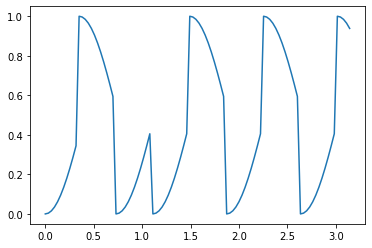

In [ ]:

time = np.linspace(0, eta, len(sol[:,1]))*0.5

plt.plot(time, sol[:,1])

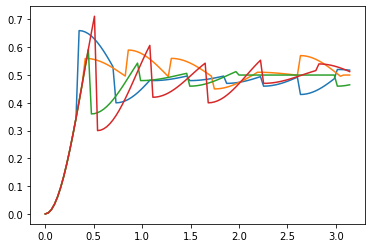

In [ ]:
for i in range(4):
    sol, phi = run_sim(2, nt, 100, 10 + 2*i, 1)
    time = np.linspace(0, eta, len(sol[:,1]))*0.5

    plt.plot(time, sol[:,1])

https://reader.elsevier.com/reader/sd/pii/S0010465518304314?token=67EF6475FBFA78FBB92DE05BDEB844DB8682028E5130079533C2BFB0597605790D59A1A033F5B5286B9790E2B798DB67

In [ ]:
a_dag = np.array([[0, 0],
                  [1,0]], dtype=complex)
a     = np.array([[0, 1],
                  [0, 0]], dtype=complex)

a_dag_minus_a = np.array([[0, -1],
                          [1,  0]], dtype=complex)
a_dag_mult_a =  np.array([[0, 0],
                          [0,1]], dtype=complex)


Identity = np.array([[1, 0],
               [0,1]], dtype=complex)

nt = 1000
ns = 1
dt = .001
I = 1j
hbar = 1

n_th = 10
kappa = 1 #Kappa is a value associated with 
jump_operators = []
eta = np.pi * 2
#Our jump operators, formed from equation (12a) and (12b) in the above source

#Jump_0 -> photon emission (jump down?)
#Jump_1 -> photon absorption (jump up)
jump_operators.append(np.matrix(np.sqrt(2 * kappa * (n_th)) * a))
jump_operators.append(np.matrix(np.sqrt(2 * kappa * (n_th+1)) * a_dag))


def GenerateHamiltonian():
    """
    Generates the Hamiltonian for our system, found by equation (13) from:
    https://reader.elsevier.com/reader/sd/pii/S0010465518304314?token=67EF6475FBFA78FBB92DE05BDEB844DB8682028E5130079533C2BFB0597605790D59A1A033F5B5286B9790E2B798DB67
    H = i * hbar * eta * (a^dag - a)
    """
    ham = I * eta * a_dag_minus_a
    return ham

def GenerateNonHermitianHamiltonian(ham):
    """
    Generates a non-hermitian hamiltonian based on equation (1b)
    """

    jump_part = np.zeros((2,2), dtype=complex)
    for i in range(2):
        jump_part += np.dot(jump_operators[i].H, jump_operators[i])

    ham_nh = ham - 0.5 * I * hbar * jump_part
    return ham_nh

def normalize(phi):
    """
    Simple function for normalizing phi, as numpy cannot normalize complex vectors
    """
    norm = 0
    for i in range(2):
        norm += np.real(np.conj(phi[i]) * phi[i])
    norm = np.sqrt(norm)
    phi/= norm


def noJump(ham_nh, dp, it, phi):
    #ham_nh = GenerateNonHermitianHamiltonian(ham)

    #Equation (2b)
    phi[it] = np.dot((Identity - (I * dt/ hbar) * ham_nh ), phi[it-1]) / np.sqrt(1-dp)
    
def jump(p_k, jump_op, it, phi):
    phi[it] = np.sqrt(dt/p_k) * (jump_op @ phi[it-1])


def calcP_k(phi):
    results = np.zeros((2))
    for k in range(2):
        #p_k = np.real()
        #p_k = np.real(np.conj(phi[0]) *  np.conj(jump_operator_mults[k]) * jump_operator_mults[k] * phi[0])
        p_k = np.real(np.conj(phi) @  jump_operators[k].H @ jump_operators[k] @ phi)
        #print(p_k)
        results[k]=(p_k[0,0])

    return np.flip(results)



def propagate_single_traj(ham, phi, measure_it, measure_steps):
    phi[0,0] = 1
    phi[0,1] = 0
    ham_nh = GenerateNonHermitianHamiltonian(ham)
    last_delta = 0

    for it in range(1, nt):
        #print(phi[it-1])
        #Generate the probability of a jump occuring.
        #A jump is more likely when dp is minimized
        #dp is smallest when the |phi| is small

        p_k_all = dt * calcP_k(phi[it-1])
        dp = np.sum(p_k_all)
        epsilon = np.random.rand()

        #print(dp, epsilon, dp>epsilon)


        #print(p_k_all)
        measure = False
        if(it -  last_delta > measure_it):
            measure = True
            if(it - last_delta > measure_it + measure_steps):
                last_delta = it
                measure = False
        if(measure):
            p_current = 0

            r = np.random.rand()
            p_k_all/=dp
            fin=False
            for i in range(2):
                if(fin):
                    continue
                p_k =p_k_all[i]
                p_current +=p_k

                if(p_current > r):
                    jump(p_k, jump_operators[i], it, phi)
                    #print(phi[it-1], p_k_all, r, "jump:" , i)

                    normalize(phi[it])
                    #print("jump: ", i)
                    break
        #Rather that performing out jumps in a random way,
        #we run no jump during a time of no measurement
        else:
            noJump(ham_nh, dp, it, phi)
            normalize(phi[it])
        
from numpy import ndarray
class myarray(ndarray):    
    @property
    def H(self):
        return self.conj().T
                    


def run_sim(nt, ns, measure_delta, measure_length):

    all_phi = np.zeros((ns, nt, 2), dtype=complex)
    phi = np.zeros((nt, 2), dtype=complex)
    population = np.zeros((nt, 2))
    ham = GenerateHamiltonian()
    #re run the simulation for ns times, taking the average
    for is_ in range(ns):
        propagate_single_traj(ham, phi, measure_delta, measure_length)
        all_phi[is_] = phi
        for it in range(nt):
            for i in range(2):
                population[it,i] += np.real(np.conj(phi[it,i]) * phi[it, i])/(1*ns)
    return population, all_phi


Below, we finally get this working as expected. We are attempting to replicate the results of the paper first mentioned in this notebook.

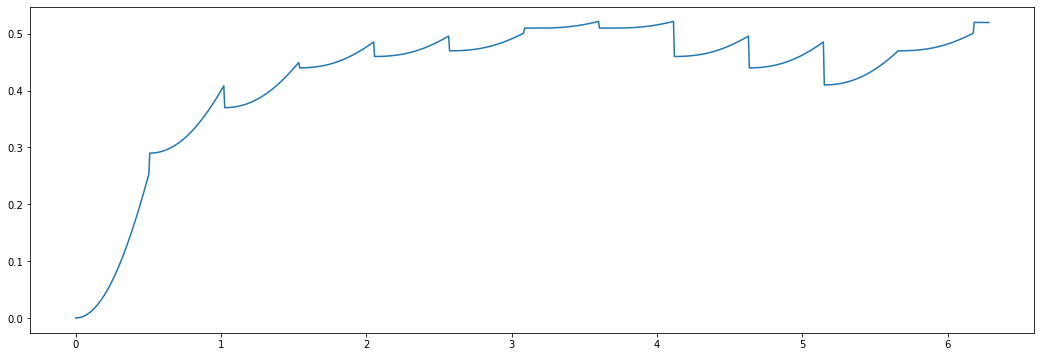

In [ ]:

sol, phi = run_sim(nt, 100, 80, 1)


plt.figure(figsize=(18,6))
time = np.linspace(0, 1, len(sol[:,1])) * np.pi * 2

plt.plot(time, sol[:,1])

At the moment our x axis units are arbitrary, we can attempt to fix this.
We need to ensure out measurement frequency is related to the

In [ ]:
class Rabi_MCWF:
    '''
    A class that allows for simulating of a 2 level rabi system, with measurements
    taken at set intervals.
    To use, first initialise with system variables
    Then use run_experiment, while specifiying various experiment parameters

    Attributes
    ----------
    hbar: float
        The value for hbar that should be used. No default is set, but keeping
        it as unity will imporve algorithm speed
    n_th: float != 0
        A unit used in defining the magnitude of our jump operators, the exact origin
        of this valeu is not known. 
    kappa: float
        A unit used in defining the magnitude of our jump operators. Optimum to have
        time scale set such that kappa=1
    eta: float
        The rabi frequency of the system
    ham: complex matrix (2x2 numpy array)
        Matrix representing the hamiltonian of the system
    ham_nh: complex matrix (2x2 numpy array)
        Matrix representing the non hermitian hamiltonian for the system,
        the effective hamiltonian when modified by our jump operators
    jump_operators: list of 2 compelx matrix (2x2 numpy array)
        The two jump operators for this system
    '''
    def __init__(self, hbar, n_th, kappa, eta):
        '''
        Constructor for this MCWF system. Defines our hamiltonians, and our
        jump operators.

        Parameters
        ----------
        hbar: float
            The value for hbar that should be used. No default is set, but keeping
            it as unity will imporve algorithm speed
        n_th: float != 0
            A unit used in defining the magnitude of our jump operators, the exact origin
            of this valeu is not known. 
        kappa: float
            A unit used in defining the magnitude of our jump operators. Optimum to have
            time scale set such that kappa=1
        eta: float
            The rabi frequency of the system
        '''
        self.hbar = hbar
        self.n_th = n_th
        self.kappa = kappa
        self.eta = eta
        self.ham = self.GenerateHamiltonian()
        self.jump_operators = self.GenerateJumpOperators()
        self.ham_nh = self.GenerateNonHermHamiltonian()

    def GenerateHamiltonian(self):
        '''
        Generates the hamiltonian for this system 
        '''
        ham = I * self.eta * a_dag_minus_a
        return ham

    def GenerateJumpOperators(self):
        return [np.matrix(np.sqrt(2 * self.kappa * (self.n_th)) * a), 
                np.matrix(np.sqrt(2 * self.kappa * (self.n_th+1)) * a_dag)]
                
    def GenerateNonHermHamiltonian(self):
        jump_part = np.zeros((2,2), dtype=complex)
        for i in range(2):
            jump_part += np.dot(self.jump_operators[i].H, self.jump_operators[i])

        return self.ham - 0.5 * I * hbar * jump_part
    def normalize(self, phi):
        """
        Simple function for normalizing phi, as numpy cannot normalize complex vectors
        """
        norm = 0
        for i in range(2):
            norm += np.real(np.conj(phi[i]) * phi[i])
        norm = np.sqrt(norm)
        phi/= norm

    
    def noJump(self, dt, dp, it, phi):
        #ham_nh = GenerateNonHermitianHamiltonian(ham)

        #Equation (2b)
        phi[it] = np.dot((Identity - (I * dt/ self.hbar) * self.ham_nh ), phi[it-1]) / np.sqrt(1-dp)
        
    def jump(self, dt, p_k, jump_op, it, phi):
        phi[it] = np.sqrt(dt/p_k) * (jump_op @ phi[it-1])


    def calcP_k(self, phi):
        '''
        Calculates all probabilities: p_k for each of our jump operators J_k
        
        Parameters
        ----------
        '''
        results = np.zeros((2))
        for k in range(2):

            p_k = np.real(np.conj(phi) @  self.jump_operators[k].H @ self.jump_operators[k] @ phi)
            #The matrix product above results in a 1*1 numpy array, we must extract this to a float
            results[k]=(p_k[0,0])

        return np.flip(results)

    def propagate_single_traj(self, dt,n_total, phi, measure_it, measure_steps):
        '''
        Propagates the entire trajectory for a single quantum system
        '''
        phi[0,0] = 1
        phi[0,1] = 0
        last_delta = 0

        for it in range(1, n_total):
            #print(phi[it-1])
            #Generate the probability of a jump occuring.
            #A jump is more likely when dp is minimized
            #dp is smallest when the |phi| is small
            #print(phi, phi[it-1])
            p_k_all = dt * self.calcP_k(phi[it-1])
            dp = np.sum(p_k_all)
            epsilon = np.random.rand()

            #print(dp, epsilon, dp>epsilon)


            #print(p_k_all)
            measure = False
            if(it -  last_delta > measure_it):
                measure = True
                if(it - last_delta > measure_it + measure_steps):
                    last_delta = it
                    measure = False
            if(measure):
                p_current = 0

                r = np.random.rand()
                p_k_all/=dp
                fin=False
                for i in range(2):
                    if(fin):
                        continue
                    p_k =p_k_all[i]
                    p_current +=p_k

                    if(p_current > r):
                        self.jump(dt, p_k, self.jump_operators[i], it, phi)
                        #print(phi[it-1], p_k_all, r, "jump:" , i)

                        self.normalize(phi[it])
                        #print("jump: ", i)
                        break
            #Rather that performing out jumps in a random way,
            #we run no jump during a time of no measurement
            else:
                self.noJump(dt, dp, it, phi)
                self.normalize(phi[it])

    def run_experiment(self, n_total, measure_delta, measure_length, dt, iterations):
        all_phi = np.zeros((iterations, n_total, 2), dtype=complex)
        phi = np.zeros((n_total, 2), dtype=complex)
        population = np.zeros((n_total, 2))

        #re run the simulation for ns times, taking the average
        for is_ in tqdm(range(iterations)):
            self.propagate_single_traj(dt,n_total, phi, measure_delta, measure_length)
            all_phi[is_] = phi
            for it in range(n_total):
                for i in range(2):
                    population[it,i] += np.real(np.conj(phi[it,i]) * phi[it, i])/(1*iterations)
        return population, all_phi


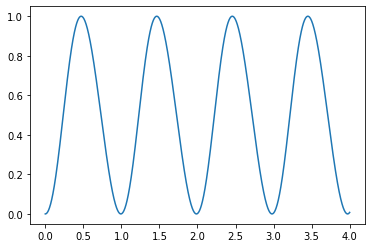

In [ ]:
class_sim = Rabi_MCWF(1,10,1,np.pi*2)
sol1, phi1 = class_sim.run_experiment(2000, np.inf, 1, dt, 1)
time = np.linspace(0, 4, len(sol1[:,0]))
plt.plot(time, sol1[:,1])

We have now created a holder class for our simulation, helping keep all variables organised. We have also defined out x axis, such that 1 represents 1 rabi period.
We currently are simulating 2000 data points. This means that 1 rabi frequency represents 500 data points. In our density matrix approach, we defined our measurement frequencies as fractions of this value.
We can now do this again

In [ ]:
mcfw_sim = Rabi_MCWF(1,10,1,np.pi*2)

it_per_rabi = 500

#We define our measurement frequencies as a fraction of our rabi period
measure_deltas = [np.inf, 0.2, 0.1, 0.04]
results = []

for delta in measure_deltas:

    measure_freq = int(delta * it_per_rabi) if (delta != np.inf) else delta

    iterations = 1 if delta == np.inf else 5000
    #print(measure_freq)
    print("Running {0} iterations for freq = {1}".format(iterations, measure_freq))
    sol, phi = mcfw_sim.run_experiment(2000, measure_freq, 1, dt, iterations)
    results.append(sol[:,1])
    #plt.plot(time, sol[:,1], label="measure_f = {0}".format(delta))


Running 1 iterations for freq = inf


  0%|          | 0/1 [00:00<?, ?it/s]

Running 5000 iterations for freq = 100


  0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 iterations for freq = 50


  0%|          | 0/5000 [00:00<?, ?it/s]

Running 5000 iterations for freq = 20


  0%|          | 0/5000 [00:00<?, ?it/s]

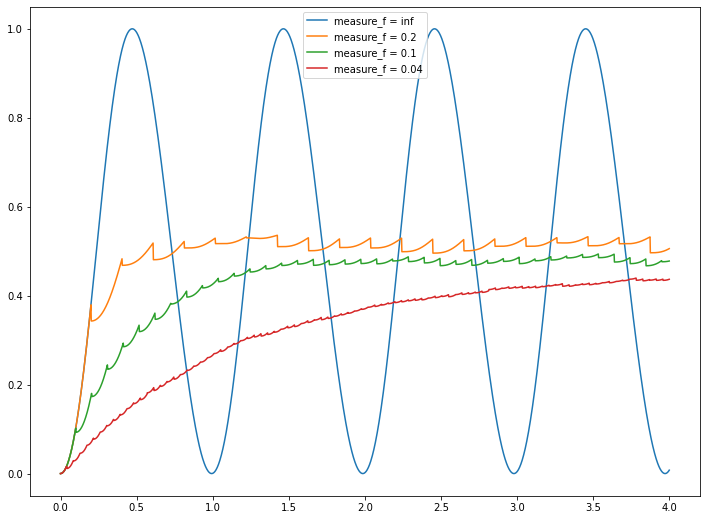

In [ ]:
time = np.linspace(0, 4, 2000)
plt.figure(figsize=(12,9))

for delta, res in zip(measure_deltas, results):
    plt.plot(time, res, label="measure_f = {0}".format(delta))

plt.legend()
plt.show()


# References



1.   Quantum Zeno effect without collapse of the wave packet, Vera Frerichs and Axel Schenzle. Available at https://journals-aps-org.libproxy.ucl.ac.uk/pra/pdf/10.1103/PhysRevA.44.1962
2.   List item


[1] Quantum Zeno effect without collapse of the wave packet, Vera Frerichs and Axel Schenzle https://journals-aps-org.libproxy.ucl.ac.uk/pra/pdf/10.1103/PhysRevA.44.1962